In [6]:
import os
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [7]:
symbol = 'MSFT'
ticker = yf.Ticker(symbol)

In [8]:
data = ticker.history(start='2010-11-01',
                      end='2023-12-21',
                      actions=True,
                      auto_adjust=True,
                      back_adjust=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3294 entries, 2010-11-01 00:00:00-04:00 to 2023-12-01 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3294 non-null   float64
 1   High          3294 non-null   float64
 2   Low           3294 non-null   float64
 3   Close         3294 non-null   float64
 4   Volume        3294 non-null   int64  
 5   Dividends     3294 non-null   float64
 6   Stock Splits  3294 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 205.9 KB


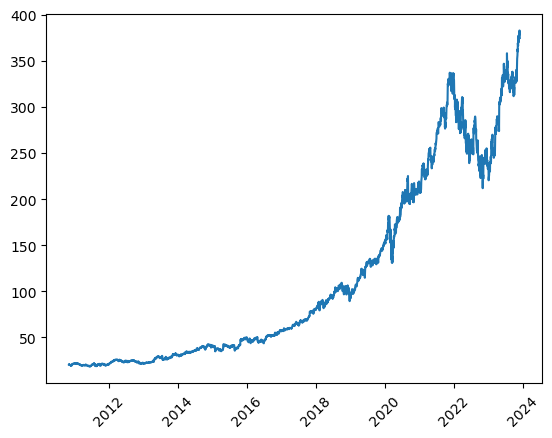

In [9]:
plt.plot(data['Close'])
plt.xticks(rotation=45)
plt.show()

In [10]:
percent_1d = (data['Close'].iloc[1:].reset_index(drop=True)-data['Close'].iloc[:-1].reset_index(drop=True))/(data['Close'].iloc[:-1].reset_index(drop=True))
vpercent_1d = (data['Volume'].iloc[1:].reset_index(drop=True)-data['Volume'].iloc[:-1].reset_index(drop=True))/(data['Volume'].iloc[:-1].reset_index(drop=True))

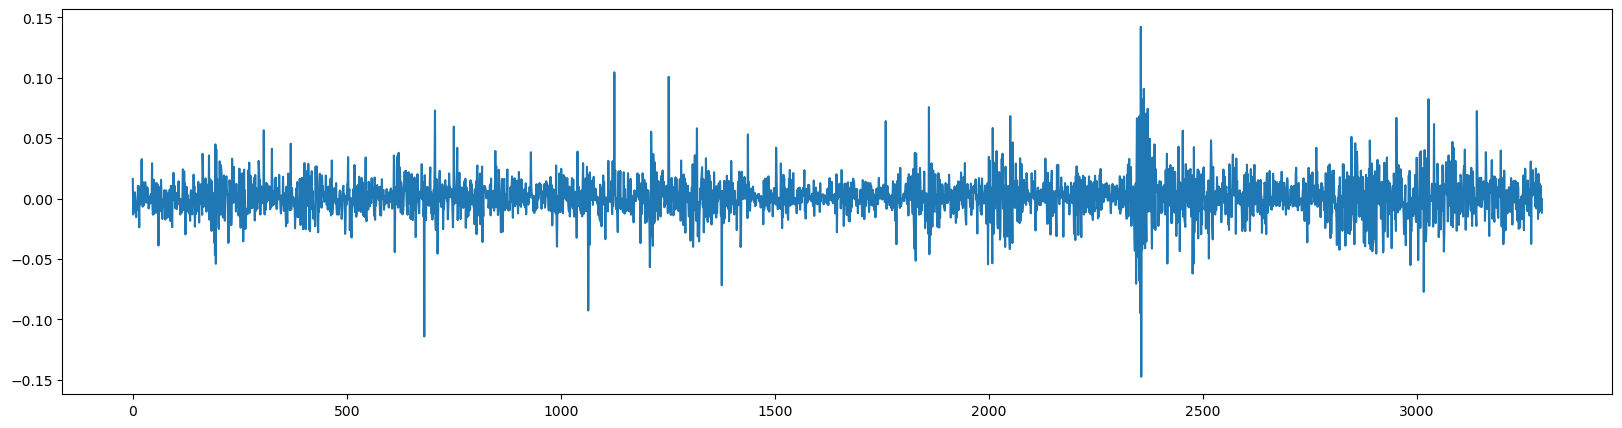

In [11]:
plt.figure(figsize=(20,5))
plt.plot(percent_1d)
plt.show()

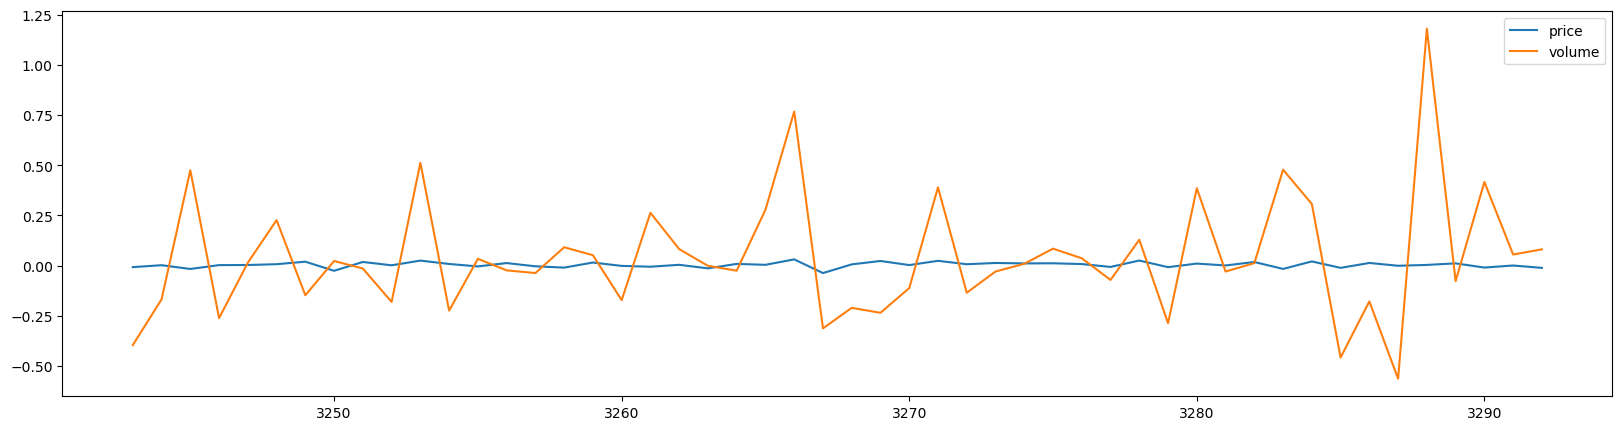

In [12]:
plt.figure(figsize=(20,5))
plt.plot(percent_1d[-50:],label='price')
plt.plot(vpercent_1d[-50:],label='volume')
plt.legend()
plt.show()

In [ ]:
percent_1d.index = data.index[1:]
vpercent_1d.index = data.index[1:]

In [44]:
data['percent_1d'] = percent_1d
data['vpercent_1d'] = vpercent_1d

In [49]:
train = data['percent_1d'].iloc[:-60]
val = data['percent_1d'].iloc[-60:-30]
test = data['percent_1d'].iloc[-30:]
trainprice = pd.concat([train.shift(3),train.shift(2),train.shift(1),train],axis=1).dropna()
valprice = pd.concat([val.shift(3),val.shift(2),val.shift(1),val],axis=1).dropna()
testprice = pd.concat([test.shift(3),test.shift(2),test.shift(1),test],axis=1).dropna()

In [50]:
train = data['vpercent_1d'].iloc[:-60]
val = data['vpercent_1d'].iloc[-60:-30]
test = data['vpercent_1d'].iloc[-30:]
trainvolume = pd.concat([train.shift(3),train.shift(2),train.shift(1),train],axis=1).dropna()
valvolume = pd.concat([val.shift(3),val.shift(2),val.shift(1),val],axis=1).dropna()
testvolume = pd.concat([test.shift(3),test.shift(2),test.shift(1),test],axis=1).dropna()

In [73]:
trainprice.columns = ['p1','p2','p3','y']
valprice.columns = ['p1','p2','p3','y']
testprice.columns = ['p1','p2','p3','y']

trainvolume.columns = ['v1','v2','v3','y']
valvolume.columns = ['v1','v2','v3','y']
testvolume.columns = ['v1','v2','v3','y']

In [113]:
import misc
import numpy as np

In [80]:
np.array(trainprice.iloc[:,:3])
np.array(trainprice.iloc[:,3])

array([-0.01068509, -0.00149007,  0.00522202, ...,  0.01487851,
       -0.00200859, -0.00892215])

In [81]:
np.array(trainprice.iloc[:,:3])

array([[ 0.01632659, -0.01314337,  0.00406936],
       [-0.01314337,  0.00406936, -0.01068509],
       [ 0.00406936, -0.01068509, -0.00149007],
       ...,
       [ 0.00115713, -0.00313264,  0.00274587],
       [-0.00313264,  0.00274587,  0.01487851],
       [ 0.00274587,  0.01487851, -0.00200859]])

In [103]:
temp = misc.customdataset(np.transpose(np.stack([np.array(trainprice.iloc[:,:3]),np.array(trainvolume.iloc[:,:3])]),(2,1,0)),np.array(trainprice.iloc[:,3]))

In [104]:
traindataloader = torch.utils.data.DataLoader(temp, batch_size=16, num_workers=0, shuffle=True)

In [106]:
a,b = next(iter(traindataloader))

In [110]:
a.permute(1,0,2).shape

torch.Size([3, 16, 2])